<a href="https://colab.research.google.com/github/Twilight1029/Python-for-Data-Analysis/blob/main/CH_12_Advanced_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12.1 Categorical Data

## Background and Motivation

Frequently, a column in a table may contain repeated instances of a smaller set of dis‐ tinct values. We have already seen functions like **unique and value_counts**, which enable us to extract the distinct values from an array and compute their frequencies, respectively:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)

In [ ]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [ ]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [ ]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

Use **dimension tables** containing the distinct values that storing the primary observations as integer keys referencing the dimension table

In [ ]:
values = pd.Series([0, 1, 0, 0] * 2)

In [ ]:
dim = pd.Series(['apple', 'orange'])

In [ ]:
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [ ]:
dim

0     apple
1    orange
dtype: object

Use **take** method to restore the original Series of strings

In [ ]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

This representation as integers is called **categorical or dictionary-encoded representation**. The array of distinct values can be called the **categories, dictionary, or levels of the data**. 

In this book we will use the terms **categorical and categories**. The integer values that reference the categories are called the **category codes or simply codes**.

The categorical representation can yield significant performance improvements when you are doing analytics. You can also perform transformations on the categories while leaving the codes unmodified. Some example transformations that can be made at relatively low cost are:
* Renaming categories
* Appending a new category without changing the order or position of the existing categories


## Categorical Type in pandas

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [ ]:
N = len(fruits)

In [ ]:
df = pd.DataFrame({'fruit' : fruits,
                   'basket_id' : np.arange(N),
                   'count' : np.random.randint(3, 15, size = N),
                   'weight' : np.random.uniform(0, 4, size = N)},
                  columns = ['basket_id', 'fruit', 'count', 'weight'])

In [ ]:
df

,basket_id,fruit,count,weight
0,0,apple,11,0.639480
1,1,orange,14,2.334785
2,2,apple,11,2.363651
3,3,apple,5,3.768436
4,4,apple,12,0.352024
5,5,orange,11,2.164150
6,6,apple,11,1.669961
7,7,apple,8,1.931560


In [ ]:
# convert df.fruit to categorical by calling 'astype('category')'
fruit_cat = df['fruit'].astype('category')

In [ ]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [ ]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

In [ ]:
# Categorical object has categories and codes attributes
c.categories

Index(['apple', 'orange'], dtype='object')

In [ ]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [ ]:
# convert a DataFrame column to categorical by assigning the converted result
df['fruit'] = df['fruit'].astype('category')

In [ ]:
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

create **pandas.Categorical** directly from other types of Python sequences


In [ ]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

In [ ]:
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

Use **from_codes** constructor

In [ ]:
categories = ['foo', 'bar', 'baz'] 

In [ ]:
codes = [0, 1, 2, 0, 0, 1]

In [ ]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)

In [ ]:
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

Unless explicitly specified, categorical conversions **assume no specific ordering of the categories**. So the categories array may be in a different order depending on the ordering of the input data. When using from_codes or any of the other constructors, you can **indicate that the categories have a meaningful ordering**:


In [ ]:
ordered_cat = pd.Categorical.from_codes(codes, categories, 
                                        ordered = True)

In [ ]:
ordered_cat 
# the output indicates that 'foo' precedes 'bar' in the ordering

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

**as_ordered** can make an unordered categorical instance ordered

In [ ]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

## Computations with Categiricals

Using Categorical in pandas compared with the non-encoded version (like an array of strings) generally behaves the same way. Some parts of pandas, like the groupby function, perform better when working with categoricals. There are also some func‐ tions that can utilize the ordered flag.

Use **pandas.qcut** binning function to return pandas.Categorical.

In [ ]:
np.random.seed(12345)

In [ ]:
draws = np.random.randn(1000)

In [ ]:
draws[:5]

array([-0.98350472,  0.93094376, -0.81167564, -1.83015626, -0.13873015])

In [ ]:
# compute a quartile binning of this data and extract some statistics
bins = pd.qcut(draws, 4)

In [ ]:
bins

[(-3.746, -0.623], (0.677, 3.26], (-3.746, -0.623], (-3.746, -0.623], (-0.623, -0.0206], ..., (-3.746, -0.623], (-0.623, -0.0206], (-0.623, -0.0206], (-3.746, -0.623], (0.677, 3.26]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -0.623] < (-0.623, -0.0206] < (-0.0206, 0.677] <
                                    (0.677, 3.26]]

In [ ]:
# labels argument in qcut
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
bins

['Q1', 'Q4', 'Q1', 'Q1', 'Q2', ..., 'Q1', 'Q2', 'Q2', 'Q1', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [ ]:
bins.codes[:10]

array([0, 3, 0, 0, 1, 2, 2, 1, 3, 2], dtype=int8)

In [ ]:
# use groupby to extract some summary statistics
bins = pd.Series(bins, name = 'quartile')

In [ ]:
results = (pd.Series(draws)\
           .groupby(bins)\
           .agg(['count', 'min', 'max'])\
           .reset_index())

In [ ]:
results

,quartile,count,min,max
0,Q1,250,-3.745356,-0.627426
1,Q2,250,-0.621249,-0.021299
2,Q3,250,-0.019941,0.677246
3,Q4,250,0.677263,3.260383


## Better performance with categoricals

If you do a lot of analytics on a particular dataset, converting to categorical can yield substantial overall performance gains. 

A categorical version of a DataFrame column will often use significantly less memory, too.

In [ ]:
N = 100000000

In [ ]:
draws = pd.Series(np.random.randn(N))

In [ ]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [ ]:
# convert labels to categorical
categories = labels.astype('category')

Series uses significantly more memory than categories

In [ ]:
labels.memory_usage()

800000128

In [ ]:
categories.memory_usage()

100000320

In [ ]:
# The conversion to category is not free, but it's a one-time cost
%time_ = labels.astype('category')

UsageError: Line magic function `%time_` not found.


## Categorical Methods

Series containing categorical data have several special methods similar to the Series.str specialized string methods. This also provides convenient access to the categories and codes

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)

In [ ]:
cat_s = s.astype('category')

In [ ]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [ ]:
# special attribute cat provides access to categorical methods
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

Use **set_categories** method to change the set of categories

In [ ]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [ ]:
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [ ]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

**value_counts** to count the categories

In [ ]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [ ]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In large datasets, categoricals are often used as a convenient tool for memory savings and better performance. 

After you filter a large DataFrame or Series, many of the categories may not appear in the data. To help with this, we can **use the remove_unused_categories method to trim unobserved categories:**

In [ ]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [ ]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [ ]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

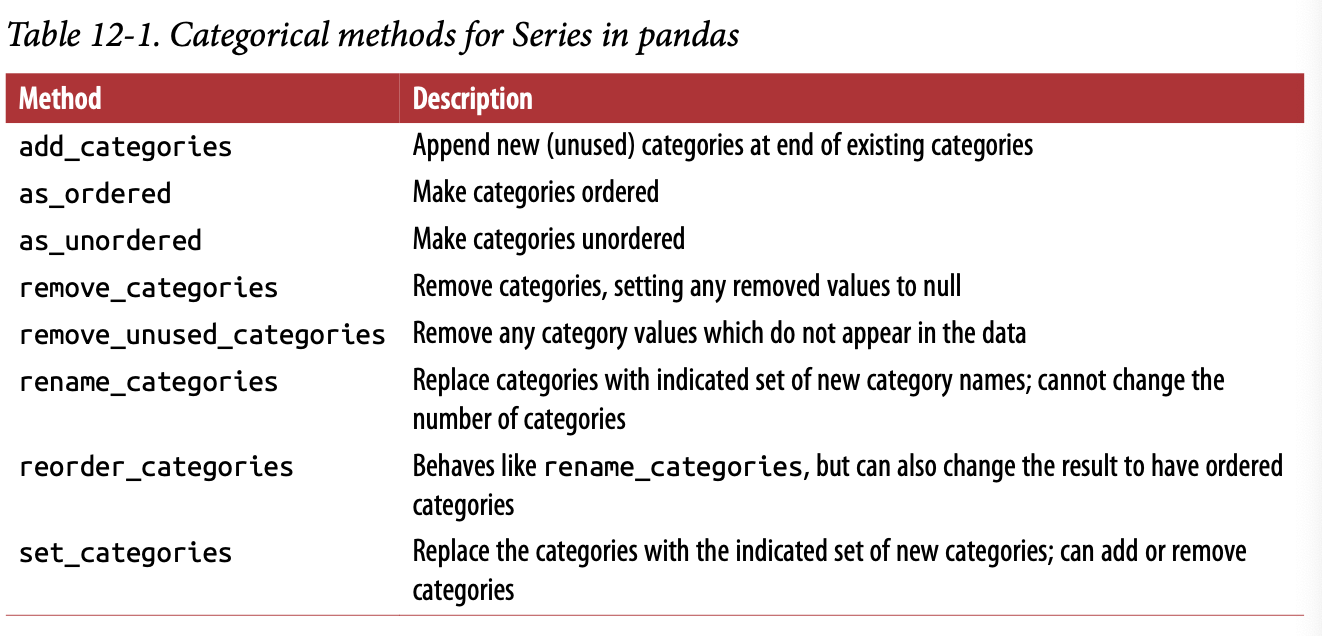

## Creating dummy variables for modeling

When you’re using statistics or machine learning tools, you’ll often transform catego‐ rical data into dummy variables, also known as **one-hot encoding**. This involves creating a DataFrame with a column for each distinct category; these columns contain 1s for occurrences of a given category and 0 otherwise.

In [ ]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype = 'category')

**pandas.get_dummies** function converts the one-dimensional categorical data into a DataFrame containing the dummy variable

In [ ]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12.2 Advanced GroupBy Use

## Group Transforms and "Unwrapped" GroupBys

**transorm** method is similar to apply but imposes more constraints on the kind of funcion you can use:
* It can produce a scalar value to be broadcast to the shape of the group
* It can produce an object of the same shape as the input group
* It must not mutate its input

In [ ]:
df = pd.DataFrame({'key' : ['a', 'b', 'c'] * 4,
                   'value' : np.arange(12.)})

In [ ]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [ ]:
# get the group means by key
g = df.groupby('key').value

In [ ]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [ ]:
# we want to produce a Series of the same shape as df['value]
# but with values replaced by the average gouped by 'key'
g.transform(lambda x : x.mean()) # use lambda in transform, similar as apply

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [ ]:
# pass a string alias in the transform method
# it's a built-in aggregation function
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

Like apply, transform works with functions that return Series, but the result must be the same size as the input

In [ ]:
g.transform(lambda x : x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [ ]:
# compute the ranks in descending order for each group
g.transform(lambda x : x.rank(ascending = False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

Consider a group transformation function composed from simple aggregations

In [ ]:
def normalize(x):
  return (x - x.mean()) / x.std()

In [ ]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [ ]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

Built-in aggregate functions like 'mean' or 'sum' are often much faster than a general apply function. These also have a **“fast past” when used with transform.**This allows us to perform a so-called unwrapped group operation:

In [ ]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [ ]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

In [ ]:
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## Grouped Time Resampling

For time series data, the resample method is semantically a group operation based on a time intervalization.

In [ ]:
N = 15

In [ ]:
times = pd.date_range('2017-05-20 00:00', freq = '1min', periods = N)

In [ ]:
df = pd.DataFrame({'time' : times,
                   'values' : np.arange(N)})

In [ ]:
df

,time,values
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [ ]:
# index by 'time' and then resample
df.set_index('time').resample('5min').count()

,values
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


Suppose that a DataFrame contains multiple time series, marked by an additional group key column:

In [ ]:
df2 = pd.DataFrame({'time' : times.repeat(3),
                    'key' : np.tile(['a', 'n', 'c'], N),
                    'vlue' : np.arange(N * 3.)})

In [ ]:
df2[:7]

,time,key,vlue
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,n,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,n,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


To do the same resampling for each value of 'key', we have the pandas.TimeGrouper object

In [ ]:
time_key = pd.TimeGrouper('5min') # Pandas has no attribute timegrouper

In [ ]:
# set the time index, group by 'key' and time_key, then aggregate
resampled = (df2.set_index('time')\
             .groupby(['key', time_key])\
             .sum())

In [ ]:
resampled

In [ ]:
resampled.reset_index()

One constraint with using TimeGrouper is that **the time must be the index of the Series or DataFrame.**

# 12.3 Techniques for Method Chaining

When applying a sequence of transformations to a dataset, you may find yourself creating numerous temporary variables that are never used in your analysis. For example:

In [ ]:
df = load_data()
df2 = df[df['col2'] < 0]
df2['col2_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()

**DataFrame.assign** method is a functional alternative to column assignments of the form df[k] = v. Rather than modifying the object in-place, it returns a new DataFrame with the indicated modifications. So these statements are equivalent:

In [ ]:
# Usual non-functional way
df2  = df.copy()
df2['k'] = v

# Functional assign way
df2 = df.assign(k = v)

Assigning in-place may execute faster than using assign, but assign enables easier method chaining:

In [ ]:
result = (df2.assign(col1_demeaned = df2.col1 - df2.col2.mean())\
          .groupby('key')\
          .col1_demeaned.std())

One thing to keep in mind when doing method chaining is that you may need to refer to temporary objects. In the preceding example, we cannot refer to the result of load_data until it has been assigned to the temporary variable df. To help with this, assign and many other pandas functions accept function-like arguments, also known as callables.

To show callables in action, consider a fragment of the example from before:

In [ ]:
df = load_data()
df2 = df[df['col2'] < 0]

# This can be rewritten as:
df = (load_data()[lambda x : x ['col2'] < 0])

Here, the result of load_data is not assigned to a variable, so the function passed into [] is then bound to the object at that stage of the method chain.

We can continue, then, and write the entire sequence as a single chained expression:

In [ ]:
result = (load_data()\
          [lambda x : x.col2 <0]\
          .assign(col1_demeanded = lambda x : x.col1 - x.col1.mean())\
          .groupby('key')\
          .col1_demeanded.std())

## The pipe Method

Use your own functions or functions from third-party libraries.

Consider a sequence of function calls:

In [ ]:
a = f(df, arg1 = v1)
b = g(a, v2, arg3 = v3)
c = h(b, arg4 = v4)

When using functions that accept and return Series or DataFrame objects, you can rewrite this using calls to pipe:

In [ ]:
result = (df.pipe(f, arg1 = v1)\
          .pipe(g, v2, arg3 = v3)\
          .pipe(h, arg4 = v4))

The statement f(df) and df.pipe(f) are equivalent, but pipe makes chained invocation easier.

A potentially useful pattern for pipe is to **generalize sequences of operations into reusable functions**. As an example, let’s consider substracting group means from a column:

In [ ]:
g = df.groupby(['key1', 'key2'])
df['col1'] = df['col1'] - g.transform('mean')

Suppose that you wanted to be able to demean more than one column and easily change the group keys. Additionally, you might want to perform this transformation in a method chain. Here is an example implementation:

In [ ]:
def group_demean(df, by, cols):
  result = df.copy()
  g = df.groupby(by)
  for c in cols:
    result[c] = df[c] - g[c].transform('mean')
  return result

Then it is possible to write:

In [ ]:
result = (df[df.col1 < 0]\
          .pipe(groupe_demean, ['key1', 'key2'], ['col1']))